# CS145 Howework 1 

<span style="color:red"> **Important Note:** </span>
HW1 is due on **11:59 PM PT, Oct 19 (Monday, Week 3)**. Please submit through GradeScope (you will receive an invite to Gradescope for CS145 Fall 2020.). 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Kevin Li, UID: XXXXXXXXX** </span>

## Before You Start

You need to first create HW1 conda environment by the given `cs145hw1.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw1.yml
conda activate hw1
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw1.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [19]:
import numpy as np 
import pandas as pd
import sys 
import random as rd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


If you can successfully run the code above, there will be no problem for environment setting.

## 1. Linear regression 
This workbook will walk you through a linear regression example. 

In [20]:
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
# As a sanity check, we print out the size of the training data (1000, 100) and training labels (1000,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (1000, 100)
Training labels shape: (1000,)


### 1.1 Closed form solution
In this section, complete the `getBeta` function in `linear_regression.py` which use the close for solution of $\hat{\beta}$.

Train you model by using `lm.train('0')` function.

Print the training error and the testing error using `lm.predict` and `lm.compute_mse` given.

In [21]:
from hw1code.linear_regression import LinearRegression

lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
training_error= 0
testing_error= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

beta = lm.train('0')
y_train_hat = lm.predict(lm.train_x, beta)
y_test_hat = lm.predict(lm.test_x, beta)

training_error = lm.compute_mse(y_train_hat, lm.train_y)
testing_error = lm.compute_mse(y_test_hat, lm.test_y)

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training error is: ', training_error)
print('Testing error is: ', testing_error)

Learning Algorithm Type:  0
Training error is:  0.08693886675396781
Testing error is:  0.11017540281675806


### 1.2 Batch gradient descent
In this section, complete the `getBetaBatchGradient` function in `linear_regression.py` which compute the gradient of the objective fuction. 

Train you model by using `lm.train('1')` function.

Print the training error and the testing error using `lm.predict` and `lm.compute_mse` given.

In [22]:
lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
training_error= 0
testing_error= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

beta = lm.train('1')
y_train_hat = lm.predict(lm.train_x, beta)
y_test_hat = lm.predict(lm.test_x, beta)

training_error = lm.compute_mse(y_train_hat, lm.train_y)
testing_error = lm.compute_mse(y_test_hat, lm.test_y)

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_error)
print('Testing accuracy is: ', testing_error)

Learning Algorithm Type:  1
Training accuracy is:  0.08693902047792586
Testing accuracy is:  0.11018845441523527


### 1.3 Stochastic gadient descent 
In this section, complete the `getBetaStochasticGradient` function in `linear_regression.py`, which use an estimated gradient of the objective function.

Train you model by using `lm.train('2')` function.

Print the training error and the testing error using `lm.predict` and `lm.compute_mse` given.

In [23]:
lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
training_error= 0
testing_error= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

lm.lr = 0.0005
beta = lm.train('2')
y_train_hat = lm.predict(lm.train_x, beta)
y_test_hat = lm.predict(lm.test_x, beta)

training_error = lm.compute_mse(y_train_hat, lm.train_y)
testing_error = lm.compute_mse(y_test_hat, lm.test_y)

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_error)
print('Testing accuracy is: ', testing_error)

Learning Algorithm Type:  2
Training accuracy is:  0.09531517836589815
Testing accuracy is:  0.11959236638904801


### Questions: 
1. Compare the MSE on the testing dataset for each version. Are they the same? Why or why not?
2. Apply z-score normalization for eachh featrure and comment whether or not it affect the three algorithm. 
3. Ridge regression is adding an L2 regularization term to the original objective function of mean squared error. The objective function become following: 
    $$ J(\beta) = \frac{1}{2n} \sum_i \left(x_i^T\beta - y_i \right)^2 + \frac{\lambda}{2n} \sum_j \beta_j^2 ,$$ 
where $\lambda \geq 0$, which is a hyper parameter that controls the trade off. Take the derivative of this provided objective function and derive the closed form solution for $\beta$. 

### Your answer here: 


In [24]:
# Running normalized versions
lm=LinearRegression()
lm.load_data('./data/linear-regression-train.csv','./data/linear-regression-test.csv')
print(f'Feature average std: {lm.train_x.describe().loc["std"].mean()}\n')
lm.normalize()

def run_alg(a):
    beta = lm.train(a)
    training_error = lm.compute_mse(lm.predict(lm.train_x, beta), lm.train_y)
    testing_error = lm.compute_mse(lm.predict(lm.test_x, beta), lm.test_y)
    print('Training error is: ', training_error)
    print('Testing error is: ', testing_error, '\n')

for a in ('0', '1', '2'):
    run_alg(a)

Feature average std: 2.3522292509877913

Learning Algorithm Type:  0
Training error is:  0.08693886675396784
Testing error is:  0.11017540281675804 

Learning Algorithm Type:  1
Training error is:  0.10018132194244624
Testing error is:  0.13900607116647945 

Learning Algorithm Type:  2
Training error is:  0.10992817207625191
Testing error is:  0.13117156993305695 



<span style="color:blue">

1. The MSE is slightly different but close for each version. They're different because they each take different paths to optimizing beta, but they all end up in a similar place because (it seems like) this problem is probably convex i.e. only has one optimum solution. To be precise, the first closed form solution should actually get the beta with the minimum error while BGD and SGD simply run for a certain number of iterations, then stop wherever they are. Since they involve choosing a random beta and SGD randomly samples from the training dataset, they will perform slightly randomly (although asymptotically they should still converge on the optimal beta)

2. Z-scoring the features has no effect on the closed form solution but does slightly affect the gradient descent algorithms. This is because linear regression simply assigns a weight ($\beta_i$) to each feature; if the feature's size is scaled, then the respective weight will be scaled appropriately to compensate. The "zeroing" of the features is also accounted for due to the addition of the bias term (which we see is added via the addAllOneColumn function). For the gradient descent algorithms, since they actually use the feature values to calculate their gradients and are affected by the feature values, we see mild effects on the model. One reason this happens is because Z-scoring (normalizing) is done to make each feature "just as important" as each other to avoid quickly converging on a solution that only uses some features. For example, if the standard deviation of $x_1$ is massive and the standard deviation of $x_2$ is tiny and we had the true solution be $y = x_1 + x_2$, then we would be able to converge on a "pretty good" solution by simply guessing $y = x_1$ i.e. $b_1 = 1, b_2 = 0$. Note that this does not neccessarily mean normalization improves performance! In fact in our case, it seems to hurt performance (although it would be nice to do something more like k-fold validation to investigate more thoroughly). It also helps with avoiding overflow which we saw affect SGD (previously without normalization, we needed to reduce the learning rate to avoid overflow).

3. The solution ends up being $\beta = (X^TX+\lambda I)^{-1} X^T y$

$$ J(\beta) = \frac{1}{2n} \sum_i \left(x_i^T\beta - y_i \right)^2 + \frac{\lambda}{2n} \sum_j \beta_j^2 $$ 
$$ J(\beta) = \frac{1}{2n} (X\beta - Y)^T(X\beta - Y) + \frac{\lambda}{2n} \beta^T \beta $$
We know what the left side (original loss) turns into since it's the same as the original loss function $J(\beta)$, so we get the following
$$ \frac{\partial J}{\partial \beta} =  (X^TX\beta - X^Ty) / n + \frac{\partial J}{\partial \beta} \left( \frac{\lambda}{2n} \beta^T \beta \right) $$
Taking the derviative of the right side, we get
$$ \frac{\partial J}{\partial \beta} =  (X^TX\beta - X^Ty) / n + \frac{\lambda}{n} \beta $$
We set the derviative equal to zero and do some rearranging and get
$$ 0 = \frac{1}{n} \left(X^TX\beta - X^Ty + \lambda \beta \right) $$

$$ X^Ty = X^TX\beta + \lambda \beta $$
$$ X^Ty = \beta (X^TX + \lambda I) $$
$$ (X^TX + \lambda I)^{-1} X^Ty = \beta $$
    
</span>

## 2. Logistic regression 
This workbook will walk you through a logistic regression example. 

In [25]:
from hw1code.logistic_regression import LogisticRegression

lm=LogisticRegression()
lm.load_data('./data/logistic-regression-train.csv','./data/logistic-regression-test.csv')
# As a sanity chech, we print out the size of the training data (1000, 5) and training labels (1000,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (1000, 5)
Training labels shape: (1000,)


### 2.1 Batch gradiend descent
In this section, complete the `getBeta_BatchGradient` in `logistic_regression.py`, which compute the gradient of the log likelihoood function. 

Complete the `compute_avglogL` function in `logistic_regression.py` for sanity check. 

Train you model by using `lm.train('0')` function.

And print the training and testing accuracy using `lm.predict` and `lm.compute_accuracy` given. 

In [26]:
lm=LogisticRegression()
lm.load_data('./data/logistic-regression-train.csv','./data/logistic-regression-test.csv')
training_accuracy= 0
testing_accuracy= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

lm.normalize()

beta = lm.train('0')
y_train_hat = lm.predict(lm.train_x, beta)
y_test_hat = lm.predict(lm.test_x, beta)

training_accuracy = lm.compute_accuracy(y_train_hat, lm.train_y)
testing_accuracy = lm.compute_accuracy(y_test_hat, lm.test_y)

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_accuracy)
print('Testing accuracy is: ', testing_accuracy)

average logL for iteration 0: -0.4893882425713696 	
average logL for iteration 1000: -0.460100375350853 	
average logL for iteration 2000: -0.460100375350853 	
average logL for iteration 3000: -0.460100375350853 	
average logL for iteration 4000: -0.460100375350853 	
average logL for iteration 5000: -0.460100375350853 	
average logL for iteration 6000: -0.460100375350853 	
average logL for iteration 7000: -0.460100375350853 	
average logL for iteration 8000: -0.460100375350853 	
average logL for iteration 9000: -0.460100375350853 	
Training avgLogL:  -0.460100375350853
Training accuracy is:  0.797
Testing accuracy is:  0.7534791252485089


### 2.2 Newton Raphhson
In this section, complete the `getBeta_Newton` in `logistic_regression.py`, which make use of both first and second derivative.

Train you model by using `lm.train('1')` function.

Print the training and testing accuracy using `lm.predict` and `lm.compute_accuracy` given. 

In [27]:
lm=LogisticRegression()
lm.load_data('./data/logistic-regression-train.csv','./data/logistic-regression-test.csv')
training_accuracy= 0
testing_accuracy= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

lm.normalize()

beta = lm.train('1')
y_train_hat = lm.predict(lm.train_x, beta)
y_test_hat = lm.predict(lm.test_x, beta)

training_accuracy = lm.compute_accuracy(y_train_hat, lm.train_y)
testing_accuracy = lm.compute_accuracy(y_test_hat, lm.test_y)

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_accuracy)
print('Testing accuracy is: ', testing_accuracy)

average logL for iteration 0: -0.4905626329298569 	
average logL for iteration 500: -0.460100375350853 	
average logL for iteration 1000: -0.460100375350853 	
average logL for iteration 1500: -0.460100375350853 	
average logL for iteration 2000: -0.460100375350853 	
average logL for iteration 2500: -0.460100375350853 	
average logL for iteration 3000: -0.460100375350853 	
average logL for iteration 3500: -0.460100375350853 	
average logL for iteration 4000: -0.460100375350853 	
average logL for iteration 4500: -0.460100375350853 	
average logL for iteration 5000: -0.460100375350853 	
average logL for iteration 5500: -0.460100375350853 	
average logL for iteration 6000: -0.460100375350853 	
average logL for iteration 6500: -0.460100375350853 	
average logL for iteration 7000: -0.460100375350853 	
average logL for iteration 7500: -0.460100375350853 	
average logL for iteration 8000: -0.460100375350853 	
average logL for iteration 8500: -0.460100375350853 	
average logL for iteration 9000

### Questions: 
1. Compare the accuracy on the testing dataset for each version. Are they the same? Why or why not?
2. Regularization. Similar to linear regression, an regularization term could be added to logistic regression. 
The objective function becomes following: 
    $$ J(\beta) = -\frac{1}{n} \sum_i \left(y_i x_i^T \beta - \log \left( 1+ \exp\{ x_i^T \beta \} \right) \right) + \lambda \sum_j \beta_j^2,$$ 
where $\lambda \geq 0$, which is a hyper parameter that controls the trade off. Take the derivative $\frac{\partial J(\beta)}{\partial \beta_j}$ of this provided objective function and provide the batch gradient descent update.

### Your answer here:

<span style="color:blue">

1. They are the same since the both converged on the same (probably very close to optimal) solution. Newton-Raphson is simply a different optimizer and can therefore have different properties (i.e. speed, ability to find global optimum, precision, etc) but if they both find the global optimum, they will obviously have the same results

2. The batch gradient update ends up being $\beta_j^{t + 1} = B_j^t + \eta \left(-2 \lambda \beta_j + \frac{1}{n} \sum_i x_{ij} (c_i - p_i(\beta))\right)$

$$ J(\beta) = -\frac{1}{n} \sum_i \left(y_i x_i^T \beta - \log \left( 1+ e^{x_i^T \beta} \right) \right) + \lambda \sum_j \beta_j^2$$
Like before, we know the derivative of the left part of the equation since it's the regular log likelihood loss function and we covered the derivative in class, so we gradient

$$ \frac{\partial J}{\partial \beta_j} = -\frac{1}{n} \sum_{i=1}^n x_{ij} (y_i - p_i(\beta)) + \frac{\partial}{\partial \beta_j}\lambda \sum_j \beta_j^2$$
$$ \frac{\partial J}{\partial \beta_j} = -\frac{1}{n} \sum_{i=1}^n x_{ij} (y_i - p_i(\beta)) + 2 \lambda \beta_j$$

Now that we know the derivative, gradient descent becomes as simple as

$$ \beta_j^{t + 1} = B_j^t - \eta \frac{\partial J}{\partial \beta_j} $$
$$ \beta_j^{t + 1} = B_j^t - \eta \left(-\frac{1}{n} \sum_i x_{ij} (y_i - p_i(\beta)) + 2 \lambda \beta_j\right) $$
$$ \beta_j^{t + 1} = B_j^t + \eta \left(-2 \lambda \beta_j + \frac{1}{n} \sum_i x_{ij} (y_i - p_i(\beta))\right) $$
    
</span>

### 2.3 Visualize the decision boundary on a toy dataset

In this subsection, you will use the same implementation for another small dataset with each datapoint $x$ with only two features $(x_1, x_2)$ to visualize the decision boundary of logistic regression model.

In [29]:
from hw1code.logistic_regression import LogisticRegression

lm=LogisticRegression(verbose = False)
lm.load_data('./data/logistic-regression-toy.csv','./data/logistic-regression-toy.csv')
# As a sanity chech, we print out the size of the training data (99,2) and training labels (99,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (99, 2)
Training labels shape: (99,)


In the following block, you can apply the same implementation of logistic regression model (either in 2.1 or 2.2) to the toy dataset. Print out the $\hat{\beta}$ after training and accuracy on the train set.  

In [30]:
training_accuracy= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

lm.normalize()
beta = lm.train('1')
y_train_hat = lm.predict(lm.train_x, beta)
y_test_hat = lm.predict(lm.test_x, beta)

training_accuracy = lm.compute_accuracy(y_train_hat, lm.train_y)
testing_accuracy = lm.compute_accuracy(y_test_hat, lm.test_y)

print(f'Beta: {beta}')

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Training accuracy is: ', training_accuracy)

Training avgLogL:  -0.329147431295712
Beta: [-0.04717577  1.46005896  2.06586134]
Training accuracy is:  0.8888888888888888


Next, we try to plot the decision boundary of your learned logistic regression classifier. Generally, a decision boundary is the region of a space in which the output label of a classifier is ambiguous. That is, in the given toy data, given a datapoint $x=(x_1, x_2)$ on the decision boundary, the logistic regression classifier cannot decide whether $y=0$ or $y=1$. 

### Question

Is the decision boundary for logistic regression linear? Why or why not?

### Your answer here:

<span style="color:blue">

Yes.

We know the decision boundary for logistic regression is when $\sigma(x^T \beta) = 0.5$. Then, we know that

$$ \sigma(x^T \beta) = 0.5 $$
$$ \frac{1}{1 + e^{-x^T \beta}} = 0.5 $$
$$ 1 = e^{-x^T \beta} $$
$$0 = -x^T \beta $$

This is the equation for a hyperplane - the decision boundary is linear
    
</span>

Draw the decision boundary in the following cell. Note that the code to plot the raw data points are given. You may need `plt.plot` function (see [here](https://matplotlib.org/tutorials/introductory/pyplot.html)). 

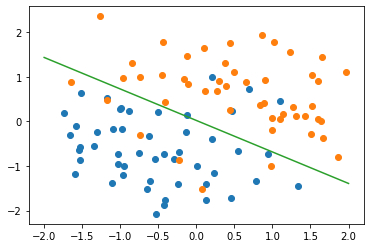

In [35]:
# scatter plot the raw data
df = pd.concat([lm.train_x, lm.train_y], axis=1)
groups = df.groupby("y")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
    
# plot the decision boundary on top of the scattered points
#========================#
# STRART YOUR CODE HERE  #
#========================#

x = np.array([-2, 2])
y = (beta[0] + beta[1] * x) / -beta[2]

plt.plot(x, y)

#========================#
#   END YOUR CODE HERE   #
#========================#
plt.show()

# End of Homework 1 :)
After you've finished the homework, please print out the entire `ipynb` notebook and two `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. 